# Lista 3: Execício 1

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [596]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.color_palette("rocket", as_cmap=True)

import control.matlab as matlab

Sinal: $y = A \cdot cos(\omega \cdot t + \phi)$

Parâmetros:
* Conhecidos: $\omega$
* Disponíveis: $y$
* Estimados: $A$, $\phi$


In [597]:
# Parametros
w = 5

In [598]:
# Parâmetros de simulação
N = 30
dt = 0.01  # Taxa de amostragem
T = np.arange(0, N + dt, dt)

T.shape

(3001,)

In [599]:
# Definiçaõ de A e phi sendo variantes no tempo 
A = np.ones((2, len(T)))
phi = np.zeros((2, len(T)))


for i in range(len(T)):
    if T[i] >= 0 and T[i] <= 10:
        A[:,i] = 3
        phi[:,i] = 0.436
    else:
        A[:,i] = 5
        phi[:, i] = 0.611

A.shape, phi.shape

((2, 3001), (2, 3001))

A: (2, 3001), phi: (2, 3001), T: (3001,)
y: (2, 3001)


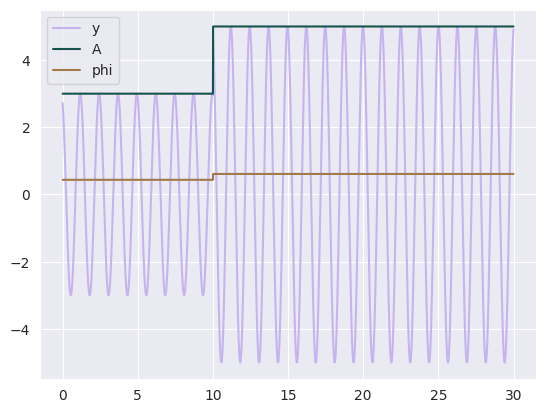

In [600]:

# Simulação dos modelos
T_rs = np.tile(T, (2, 1))

print(f'A: {A.shape}, phi: {phi.shape}, T: {T.shape}')
y = A * np.cos(np.dot(w, T_rs) + phi)

print(f'y: {y.shape}')

# Plotagem dos resultados juntos
corte = int(np.ceil(len(T)))
palette = sns.color_palette("cubehelix", 3)
plt.plot(T[:corte], y[0][:corte], label='y', color=palette[-1])
# plt.plot(T[0][:corte], y[1][:corte], label='y 2')
plt.plot(T[:corte], A[0][:corte], label='A', color=palette[0])
# plt.plot(T[0][:corte], A[1][:corte], label='A 2')
plt.plot(T[:corte], phi[0][:corte], label='phi', color=palette[1])
# plt.plot(T[0][:corte], phi[1][:corte], label='phi 2')

plt.legend()
plt.show()

In [601]:
theta = np.zeros((2, int(N/dt) + 1))  # Matriz para armazenar os parâmetros estimados
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros
z = np.zeros((1, int(N/dt) + 1))[0]  # Vetor de saída estimada
print(f'shape z {z.shape} | z: {z}')

ms = 1
theta[:, 0] = [0, np.pi/2]  # Condição inicial
gama = np.array([[1, 0], [0, 1]])  # Matriz de ajuste

shape z (3001,) | z: [0. 0. 0. ... 0. 0. 0.]


In [602]:
# Loop de iterações para o algoritmo adaptativo
for k in range(0, int(N/dt)): 
    # Construção do vetor phi
    z[k] = y[0,k] 
    phik = [np.cos(w*T[k]), -1*np.sin(w*T[k])]

    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    erro[k+1] = (z[k] - np.dot(theta[:, k].T, phik)) / ms
    delta_theta = (dt * np.dot(gama, np.dot(erro[k+1] , phik)) / ms).reshape((2,))
    theta[:, k+1] = theta[:, k] + delta_theta

In [603]:
# parametros estimados
A1est = theta[0, :]
A2est = theta[1, :]
Aest = np.sqrt(A1est**2 + A2est**2)
phiest = np.arccos(A1est / Aest)

print(f'A1est: {A1est.shape}, A2est: {A2est.shape}, Aest: {Aest.shape}, phiest: {phiest.shape}')

A1est: (3001,), A2est: (3001,), Aest: (3001,), phiest: (3001,)


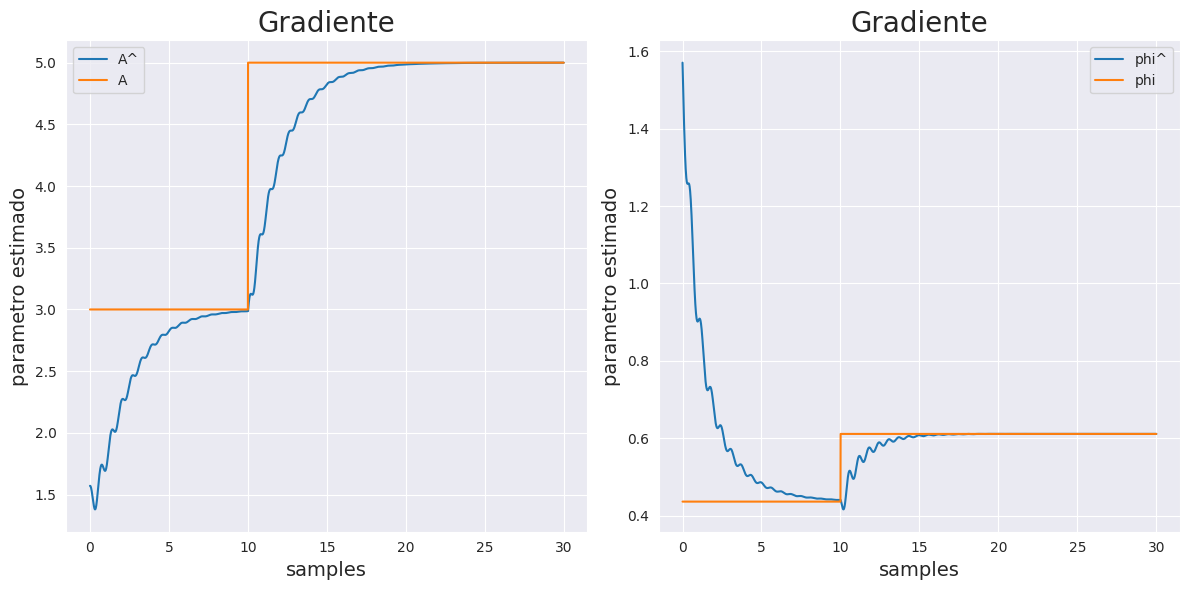

In [604]:
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

corte = int(np.ceil(1*len(theta[0])))

fontesize = 14
titlesize = 20
# Primeiro subplot (Gráfico dos parâmetros estimados)
axs[0].plot(T[:corte], Aest[:corte], label='A^')
axs[0].plot(T[:corte], A[0][:corte], label='A')
axs[0].legend()
axs[0].set_xlabel('samples', fontsize=fontesize)
axs[0].set_ylabel('parametro estimado', fontsize=fontesize)
axs[0].set_title('Gradiente', fontsize=titlesize)

# Segundo subplot 
axs[1].plot(T[:corte], phiest[:corte], label='phi^')
axs[1].plot(T[:corte], phi[0][:corte], label='phi')
axs[1].legend()
axs[1].set_xlabel('samples', fontsize=fontesize)
axs[1].set_ylabel('parametro estimado', fontsize=fontesize)
axs[1].set_title('Gradiente', fontsize=titlesize)
# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()

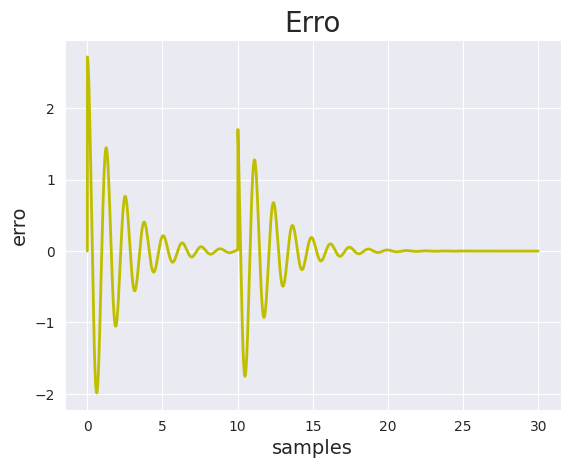

In [605]:
# Segundo subplot (Gráfico do erro)
plt.plot(T[:corte], erro[:corte], 'y', linewidth=2)
plt.xlabel('samples', fontsize=fontesize)
plt.ylabel('erro', fontsize=fontesize)
plt.title('Erro', fontsize=titlesize)
plt.grid(True)

# Exiba o gráfico
plt.show()  
